<a href="https://colab.research.google.com/github/duyguyilmaaz/VeriMadenciligi-DataMining/blob/main/DataMining_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

API(Application Programming Interface) - Uygulama Programlama Arayüzü ve ENDPOINT Kavramları Nedir?

API:
Yazılım ile sunucu uygulamaları arasında iletişimi ve veri alışverişini sağlayan bir arayüzdür. Temel olarak, bir API, bir uygulamanın başka bir uygulamanın işlevselliğine veya verilerine erişmesine izin veren bir köprü görevi görmektedir.

API'ler, belirli kurallar ve protokoller üzerinden çalışır, bu sayede iki farklı yazılım sistemi birbirleriyle sorunsuz bir şekilde etkileşime girebilir. API'ler JSON, XML, CSV, HTML dosya uzantılarında çalışmaktadır.

ENDPOINT:
Bir API'nin veya bir web servisin belirli bir işlevine veya veri kaynağına erişim sağlayan URL adresidir. API endpoint'i, API ile dış dünya (kullanıcılar veya diğer sistemler) arasındaki bağlantı noktasıdır. Endpoint'ler, API'nin dış dünyaya sunduğu işlevleri ve verilere erişim sağlayan "kapılar" gibidir. Endpointler JSON, XML, CSV ve HTML dosya uzantılarında çalışmaktadır.

API ve ENDPOINT Kullanım Kolaylığı ve Sağladığı Avantajlar:
1.Tekrar kullanılabilirlik

2.Soyutlama

3.Entegrasyon kolaylığı

4.Zaman ve Maliyet tasarrufu

5.Güvenlik ve Kontrol

ENDPOINT'lerin Kullanım Noktalarına Örnekler ->
1.Finans ve Döviz

2.Hava Durumu

3.Sosyal Medya Paylaşımları

4.E-ticaret ve Ürün Bilgileri

5.Ödeme Sistemleri

6.Haritalar ve Konum Hşzmetleri

7.Haber Servisleri

8.Sağlık ve Medikal Verileri

API'lerin Kullanım Noktalarına Örnekler ->
1.Hava Durumu API'leri -> OpenWeatherMap

2.Banka İşlemlerinde Ödeme API'leri -> PayPal

3.Sosyal Medya API'leri -> Twitter API, Facebok API

4.Doğal Dil İşleme API'leri -> OPENAI API

5.Duygu Analizi API'leri -> Microsoft Azure Al

6.Harita Uygulamaları API'leri -> IBB Şehir Haritası API'si


API ve ENDPOINT Arasındaki Teknik Kullanım Farkı Bulunmaktadır.

API (Application Programming Interface): Bir yazılımın başka bir yazılımla etkileşim kurması için kullanılan genel bir arayüzdür. Bir API, bir dizi kural, metod ve işlev içerir. API, birçok endpoint'i barındıran daha geniş bir kavramdır.

Endpoint: Bir API'nin sunduğu belirli bir veri veya işlev için belirlenen URL'dir. Endpoint, API'yi kullanarak bir işlemi başalatmak veya veri almak için spesifik bir bağlantı noktasıdır.

Erişim Adresleri

openweathermap.org (API)

https://sehirharitasiapi.ibb.gov.tr/developer/ (API)

https://www.tcmb.gov.tr/kurlar/today.xml (Endpoint)

In [2]:
print("Merhaba, İGÜ - Veri Madenciliği - D4 API") # print ekrana çıktı veren bir koddur.

Merhaba, İGÜ - Veri Madenciliği - D4 API


In [3]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod bloğudır.
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [4]:
from google.colab import drive # google colab - drive bağlantısı
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

file_path = '/content/drive/My Drive/DataMining/DataMining_week1'
directory = os.path.dirname(file_path)  # Dosyanın bulunduğu dizini al
os.chdir(directory)  # Dizine geçiş yap
print("Şu anki çalışma dizini:", os.getcwd())


Şu anki çalışma dizini: /content/drive/My Drive/DataMining


In [6]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = 'https://www.tcmb.gov.tr/kurlar/today.xml'
gelen_yanit = requests.get(url=link_bilgisi)

print(gelen_yanit.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="10.01.2025" Date="01/10/2025"  Bulten_No="2025/7" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>35.3356</ForexBuying>
			<ForexSelling>35.3992</ForexSelling>
			<BanknoteBuying>35.3108</BanknoteBuying>
			<BanknoteSelling>35.4523</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>21.8130</ForexBuying>
			<ForexSelling>21.9553</ForexSelling>
			<BanknoteBuying>21.7127</BanknoteBuying>
			<BanknoteSelling>22.0870</BanknoteSelling>
				<CrossRateUSD>1.6161</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>1

In [7]:
tree = ET.parse(urlopen(link_bilgisi))
root = tree.getroot()
liste = []
liste.append(root.findall("Currency"))

In [8]:
for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find('BanknoteSelling').text
  banknoteSelling = i.find('BanknoteBuying').text

  if currencyCode == 'USD':
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == 'EUR':
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)


USD 35.4523 35.3108
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.14150000000000063
EUR 36.5073 36.3616
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.14569999999999794


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="10.01.2025" Date="01/10/2025"  Bulten_No="2025/7" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>35.3356</ForexBuying>
			<ForexSelling>35.3992</ForexSelling>
			<BanknoteBuying>35.3108</BanknoteBuying>
			<BanknoteSelling>35.4523</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>21.8130</ForexBuying>
			<ForexSelling>21.9553</ForexSelling>
			<BanknoteBuying>21.7127</BanknoteBuying>
			<BanknoteSelling>22.0870</BanknoteSelling>
				<CrossRateUSD>1.6161</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>1

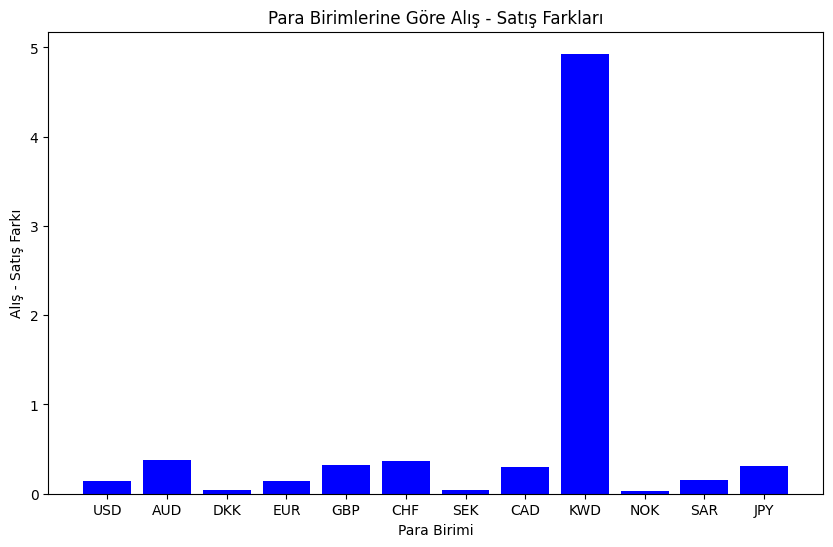

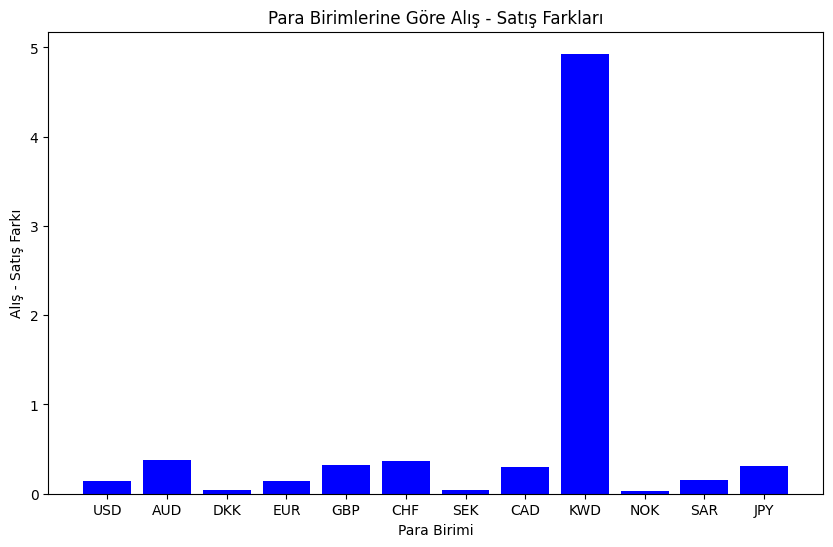

In [9]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Veri Kaynağının Linki
baglanti_adresi = 'https://www.tcmb.gov.tr/kurlar/today.xml'

# Web sitesinden XML verisini alıyoruz.
gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text) # Verinin içeriğini kontrol amaçlı yazdırıyoruz.

# XML verisini parse (çözümleme) ediyoruz.
agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

# Para birimlerini saklayacağımız listeyi oluşturuyoruz.
para_birimleri = []

# Tüm para birimlerini bulup listeye ekliyoruz
para_birimleri.append(kok.findall('Currency'))

# Para birimleri üzerinde döngü ile işlem yapıyoruz
for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod') # Para birimi kodunu alıyoruz
  alisFiyati = i.find('BanknoteSelling').text # Alış fiyatını alıyoruz
  satisFiyati = i.find('BanknoteBuying').text # Satış fiyatını alıyoruz

  # USD için işlem yapıyoruz.
  if paraBirimiKodu == 'USD':
    print(paraBirimiKodu, alisFiyati, satisFiyati)
    fark = float(alisFiyati) - float(satisFiyati)
    print('USD Banka Alış Satış Arasındaki Kur Farkı ->', fark)

  # EUR için işlem yapıyoruz
  if paraBirimiKodu == 'EUR':
    print(paraBirimiKodu, alisFiyati, satisFiyati)
    fark = float(alisFiyati) - float(satisFiyati)
    print('EUR Banka Alış Satış Arasındaki Kur Farkı ->', fark)


import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Veri Kaynağının Linki
baglanti_adresi = 'https://www.tcmb.gov.tr/kurlar/today.xml'

# Web sitesinden XML verisini alıyoruz.
gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text) # Verinin içeriğini kontrol amaçlı yazdırıyoruz.

# XML verisini parse (çözümleme) ediyoruz.
agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

# Para birimlerini saklayacağımız listeyi oluşturuyoruz.
para_birimleri = []

# Tüm para birimlerini bulup listeye ekliyoruz
para_birimleri.append(kok.findall('Currency'))

# Para birimleri üzerinde döngü ile işlem yapıyoruz
for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod') # Para birimi kodunu alıyoruz
  alisFiyati = i.find('BanknoteSelling').text # Alış fiyatını alıyoruz
  satisFiyati = i.find('BanknoteBuying').text # Satış fiyatını alıyoruz

  # USD için işlem yapıyoruz.
  if paraBirimiKodu == 'USD':
    print(paraBirimiKodu, alisFiyati, satisFiyati)
    fark = float(alisFiyati) - float(satisFiyati)
    print('USD Banka Alış Satış Arasındaki Kur Farkı ->', fark)

  # EUR için işlem yapıyoruz
  if paraBirimiKodu == 'EUR':
    print(paraBirimiKodu, alisFiyati, satisFiyati)
    fark = float(alisFiyati) - float(satisFiyati)
    print('EUR Banka Alış Satış Arasındaki Kur Farkı ->', fark)

# Verileri pandas DataFrame olarak saklama
veri = {
    'Para Birimi': [],
    'Alış Fiyatı': [],
    'Satış Fiyatı': [],
    'Fark': []
}

for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod')
  alisFiyati = i.find('BanknoteSelling').text
  satisFiyati = i.find('BanknoteBuying').text
  if alisFiyati is not None and satisFiyati is not None:
    fark = float(alisFiyati) - float(satisFiyati)
    veri['Para Birimi'].append(paraBirimiKodu)
    veri['Alış Fiyatı'].append(float(alisFiyati))
    veri['Satış Fiyatı'].append(float(satisFiyati))
    veri['Fark'].append(fark)

df = pd.DataFrame(veri)

# Pandas DataFrame verilerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color = 'blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış - Satış Farkı')
plt.title('Para Birimlerine Göre Alış - Satış Farkları')
plt.show()

for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod')
  alisFiyati = i.find('BanknoteSelling').text
  satisFiyati = i.find('BanknoteBuying').text
  if alisFiyati is not None and satisFiyati is not None:
    fark = float(alisFiyati) - float(satisFiyati)
    veri['Para Birimi'].append(paraBirimiKodu)
    veri['Alış Fiyatı'].append(float(alisFiyati))
    veri['Satış Fiyatı'].append(float(satisFiyati))
    veri['Fark'].append(fark)

df = pd.DataFrame(veri)

# Pandas DataFrame verilerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color = 'blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış - Satış Farkı')
plt.title('Para Birimlerine Göre Alış - Satış Farkları')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

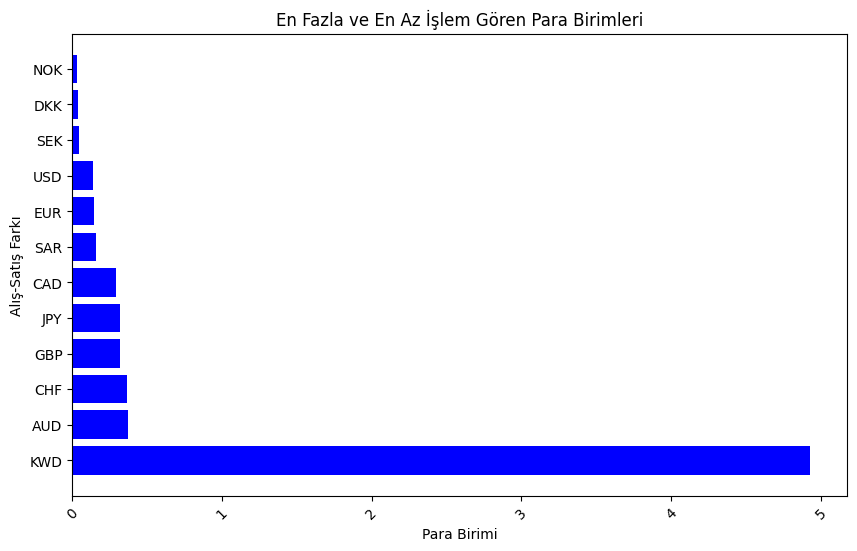

In [10]:
# Verileri alış-satış farkına göre büyükten küçüğe doğru sıralıyoruz
df_sorted = df.sort_values(by='Fark', ascending=False)
# Pandas DataFrame verilerini görselleştirme (Sıralanmış hali)
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Para Birimi'], df_sorted['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45) # Para birimi isimlerinin daha iyi görünmesi için
plt.show

In [11]:
# CSV dosyasına kaydetme
df_sorted.to_csv('kur_verileri_siralama.csv', index=False)
print("Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi")

Veriler 'kur_verileri_siralama.csv' dosyasına kaydedildi


API Kurgusu

OpenWeather API -> Hava durumu tahminleri, şimdiki zaman tahminleri ve geçmiş hızlı ve şık bir şekilde dünya üzerindeki herhangi bir koordinat için genişletilmiş hava durumu verilerini almak için Profesyonel koleksiyonlarımızı kullanın.

OpenWeather API günlük, saatlik, yıllık hava durumu verilerini almamıza olanak sağlar. İlgili verilerin tümleşik halinde ise 30 günlük iklim tahmini olarak da çıktı verebilmektedir. Veriler JSON ve XML formatlarında python üzerinde işlenebilmektedir.

ile alınabilecek bilgi içerikleri:
1.Şimdiki güncel hava durumu

2.Güncel hava durumunun 1 saatlik tahmini

3.Güncel hava durumunun 48 saatlik tahmini

4.Güncel hava durumunun 8 günlük tahmini

5.Bir tarih sürecine göre hava durumu verileri -> 45 yıl geriye - 4 gün ileriye dönük tahmini

6.Ulusal hava durumu uyarıları -> Mevcut tüm verilerden yola çıkarak

7.45 yıl geriye - 1.5 yıl ileriye yönelik günlük toplam bilgi ve tahmin

8.Hava durumu özeti

Ücretli API Bağlantı Noktası: API 3.0

Ücretsiz API Bağlantı Noktası API 2.5

https://api.openweathermap.org/data/3.0/onecall?lat=%7Blat%7D&lon=%7Blon%7D&exclude=%7Bpart%7D&appid= (API key)


Standart Bağlantıya Örnekler->

1.api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335
2.api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335&units=metric
3.api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335&units=imperial

Avcılar 40.979168 enlem ve 28.721390 boylamda yer almaktadır. Avcılar ilçesine bağlıdır. Avcılar haritası İstanbul ili içinde nerede olduğu harita merkezinde gösterilmektedir. Avcılar GPS koordinatları 40° 58’ 45.0048" ve 28° 43’ 17.0040"

In [1]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi (ücretsiz sürüm için)
    base_url = 'https://api.openweathermap.org/data/2.5/weather'

    # API'ye gönderilecek parametreler (şehir adı, API anahtarı ve metrik sistem)
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme ve ekrana yazdırma
        print(f"Hava Durumu Bilgisi - {sehir}")
        print(f"Sıcaklık: {hava_durumu['main']['temp']} °C")
        print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
        print(f"Açıklama: {hava_durumu['weather'][0]['description']}")

    except requests.exceptions.RequestException as err:
        print(f"Hata Oluştu: {err}")

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adi = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")  # Örnek: 1b849b527d42357659b98bb5ff2f8612

    # Hava durumu bilgilerini alma fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adi, api_key)



Hava durumu bilgisini almak istediğiniz şehir adını girin: sakarya
OpenWeatherMap API anahtarınızı girin: 620d0b9eb43d10e135d71460afe74105
Hava Durumu Bilgisi - sakarya
Sıcaklık: 9.72 °C
Nem Oranı: 93%
Açıklama: overcast clouds


Hava durumu bilgisini almak istediğiniz şehir adını girin: sakarya
OpenWeatherMap API anahtarınızı girin: 620d0b9eb43d10e135d71460afe74105
Hava durumu bilgisi - sakarya:
Sıcaklık: 9.72°C
Nem Oranı: 93%
Açıklana: overcast clouds


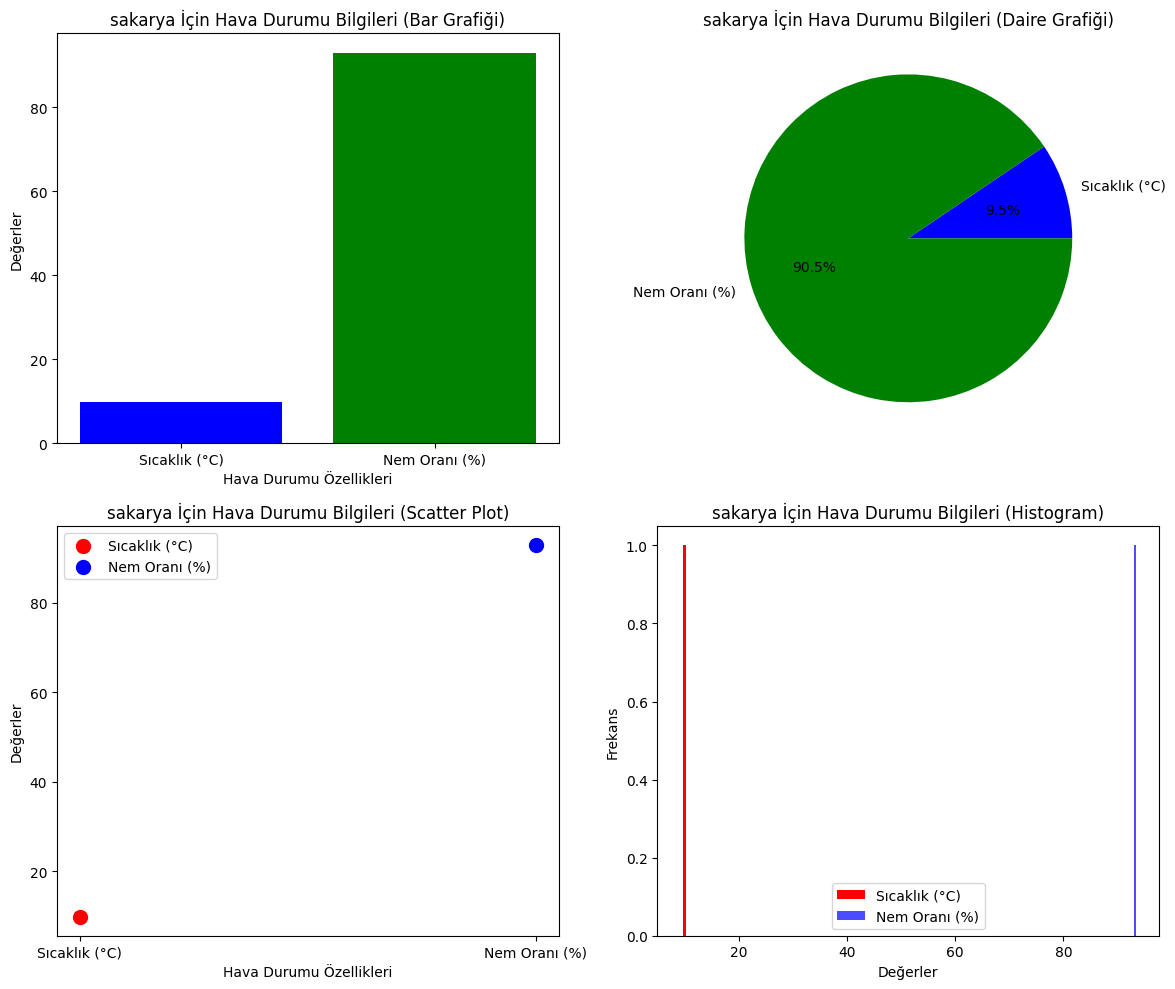

In [5]:
# pip install requests, matplotlib
import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
  # Doğru URL ve API endpointi
  base_url="https://api.openweathermap.org/data/2.5/weather"
  # API'ye gönderilecek parametreler
  params = {"q": sehir, "appid": api_anahtari, "units": "metric"}
  try:
    # API'ye GET isteği gönderme
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Hata durumunda isteği durdur

    # Cevaptan JSON verisini alma
    hava_durumu = response.json()

    # JSON verisini işleme
    print(f"Hava durumu bilgisi - {sehir}:")
    print(f"Sıcaklık: {hava_durumu['main']['temp']}°C")
    print(f"Nem Oranı: {hava_durumu['main']['humidity']}%")
    print(f"Açıklana: {hava_durumu['weather'][0]['description']}")

    # Hava durumu verilerini bir dictionary'de saklıyoruz.
    veri = {
        "Sıcaklık (°C)": hava_durumu["main"]["temp"],
        "Nem Oranı (%)": hava_durumu["main"]["humidity"]
    }

    # Bar Grafiği
    plt.figure(figsize=(12, 10)),

    plt.subplot(2, 2, 1) #2x2 grid, 1.grafik
    plt.bar(veri.keys(), veri.values(), color = ["blue", "green"])
    plt.xlabel("Hava Durumu Özellikleri")
    plt.ylabel("Değerler")
    plt.title(f"{sehir} İçin Hava Durumu Bilgileri (Bar Grafiği)")

    # Daire Grafiği (Pie Chart)
    plt.subplot(2, 2, 2) #2x2 grid, 2.grafik
    plt.pie(veri.values(), labels=veri.keys(), autopct="%1.1f%%", colors = ["blue", "green"])
    plt.title(f"{sehir} İçin Hava Durumu Bilgileri (Daire Grafiği)")

    # Scatter Plot (Dağılım Grafiği) - İki farklı renk
    plt.subplot(2, 2, 3) #2x2 grid, 3.grafik
    plt.scatter(["Sıcaklık (°C)"], [veri['Sıcaklık (°C)']], color = "red", s = 100, label = "Sıcaklık (°C)")
    plt.scatter(["Nem Oranı (%)"], [veri['Nem Oranı (%)']], color = "blue", s = 100, label = "Nem Oranı (%)")
    plt.xlabel("Hava Durumu Özellikleri")
    plt.ylabel("Değerler")
    plt.title(f"{sehir} İçin Hava Durumu Bilgileri (Scatter Plot)")
    plt.legend()

    # Histogram - Ayrı Ayrı Gösterim
    plt.subplot(2, 2, 4) #2x2 grid, 4.grafik
    plt.hist([veri["Sıcaklık (°C)"]], bins = 2, color = "red", label = "Sıcaklık (°C)")
    plt.hist([veri["Nem Oranı (%)"]], bins = 2, color = "blue", label = "Nem Oranı (%)", alpha=0.7)
    plt.xlabel("Değerler")
    plt.ylabel("Frekans")
    plt.title(f"{sehir} İçin Hava Durumu Bilgileri (Histogram)")
    plt.legend()

    plt.tight_layout()
    plt.show()

  except requests.exceptions.RequestException as err:
    print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adi = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ")

    # Hava durumu bilgilerini alma ve görselleştirme fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adi, api_key)





